In [741]:
#Importe os pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [742]:
dados = pd.read_csv("/home/anderson/Área de Trabalho/Repositorio_GitHub/Mineracao Dados-Prescritivo/Projeto-Absenteeism/Absenteeism_at_work_AAA/Absenteeism_at_work.csv",sep=';', index_col="ID")

In [743]:
dados.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,,,,,,,,,,,,,,,,,,,,
11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [744]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 11 to 35
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reason for absence               740 non-null    int64  
 1   Month of absence                 740 non-null    int64  
 2   Day of the week                  740 non-null    int64  
 3   Seasons                          740 non-null    int64  
 4   Transportation expense           740 non-null    int64  
 5   Distance from Residence to Work  740 non-null    int64  
 6   Service time                     740 non-null    int64  
 7   Age                              740 non-null    int64  
 8   Work load Average/day            740 non-null    float64
 9   Hit target                       740 non-null    int64  
 10  Disciplinary failure             740 non-null    int64  
 11  Education                        740 non-null    int64  
 12  Son                   

In [745]:
dados.describe()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [746]:
# Separar colunas categóricas
categorical_atts = ['Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']

#Separar colunas numéricas
numerical_atts = dados.drop(columns=categorical_atts).columns.to_list()

In [747]:
# Número de valores únicos para os atributos categóricos
dados[categorical_atts].nunique()


Reason for absence      28
Month of absence        13
Day of the week          5
Seasons                  4
Disciplinary failure     2
Education                4
Social drinker           2
Social smoker            2
Pet                      6
Son                      5
dtype: int64

/home/anderson/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3695: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


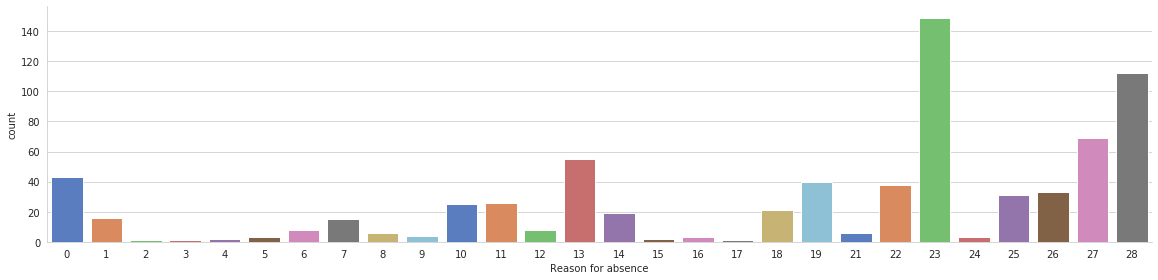

In [748]:
#Distribuição de plotagem da coluna "Motivo da ausência". Este atributo, diferente dos demais, compoe
#uma lista de subitems relacionados a falta médica, que cada CID compoe o motivo da ausência.
sns.set_style("whitegrid")
sns.catplot(data=dados, x='Reason for absence', kind= 'count',size=4, aspect=4, palette='muted')

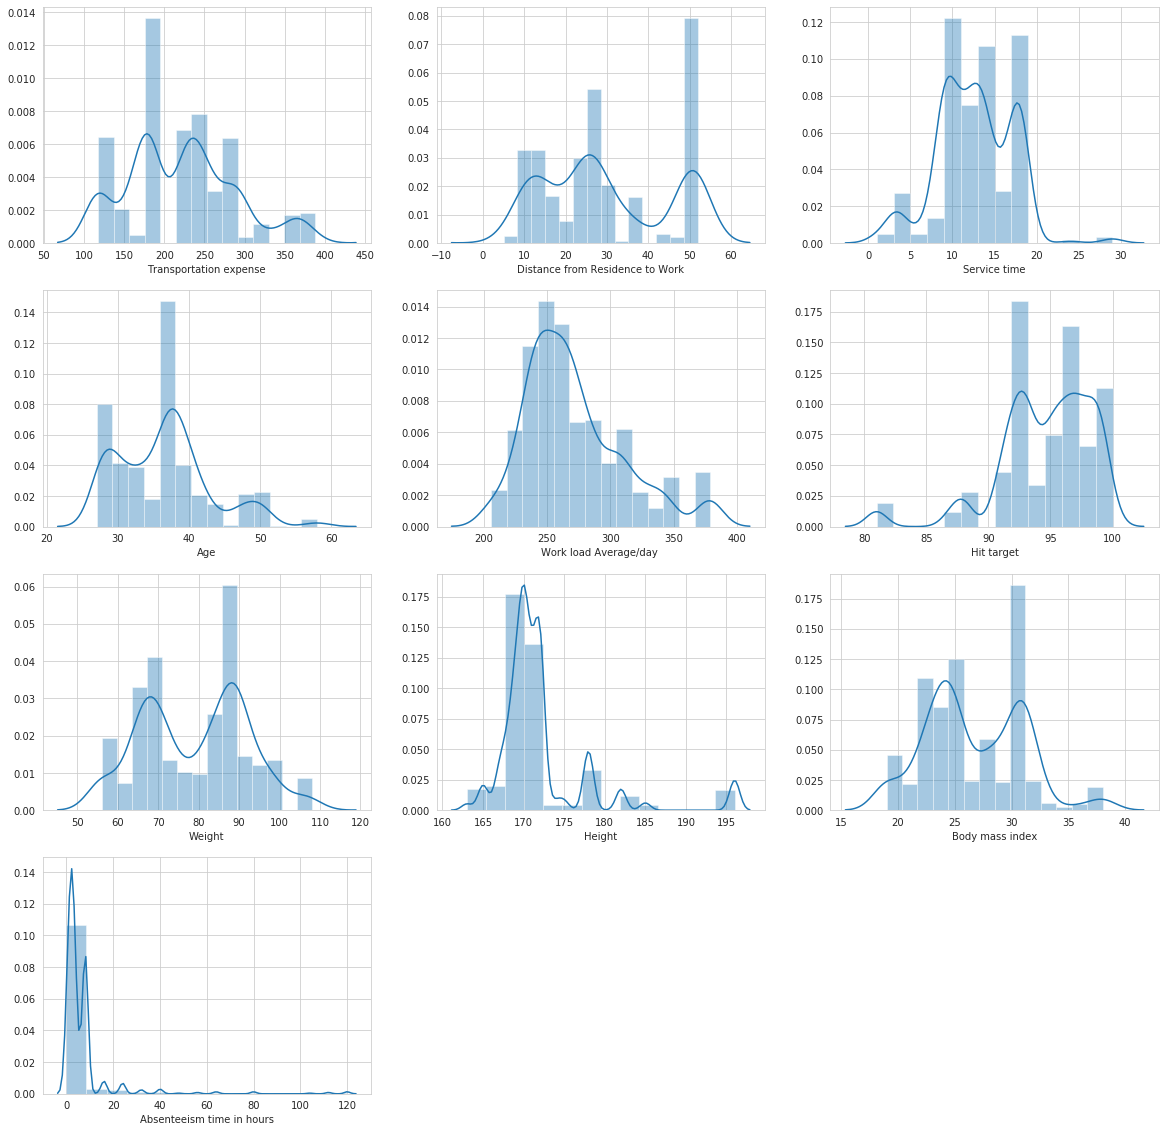

In [749]:
#Plotar a distribuição dos atributos numéricos
#Esse tipo de plotagem é interessante para conhecer melhor a característica dos atributos,
#com objetivo de identificar os picos e frequencias dos dados de forma visual.
num_df = dados[numerical_atts]
plt.figure(figsize=(20,20))
for i in range(1, 11):
    plt.subplot(4, 3, i)
    sns.distplot(num_df[num_df.columns[i-1]],bins=14)

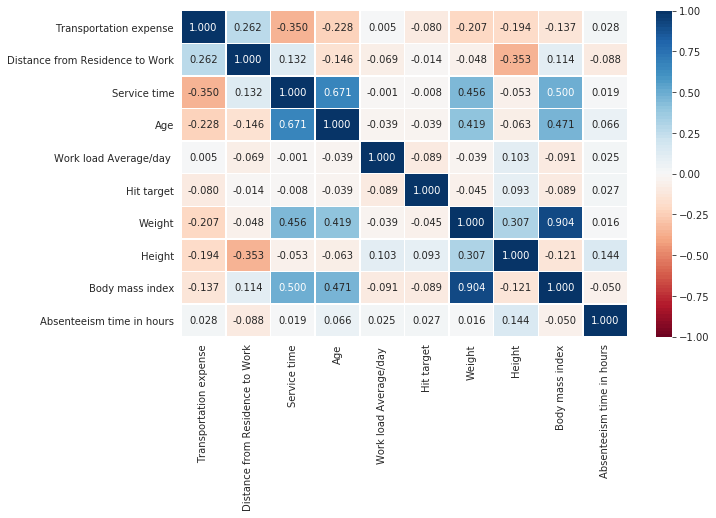

In [750]:
#Matriz de correção dos dados numéricos. Importante para enxergar a similaridade entre os atributos.
#Este tem como objetivo de facilitar na redução de dimensionalidade, pois no futuro, pode ocasionar impacto
#no processamento, caso aumente de forma exponencial os dados.

num_corr = num_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(num_corr, annot=True, fmt=".3f",vmin=-1, vmax=1, linewidths=.5, cmap = sns.color_palette("RdBu", 100))
plt.yticks(rotation=0)
plt.show()

#Diante análise pode perceber que há algumas colunas como Weight e Body mass index, a uma alta similaridade
#podendo assim se tornar uma única coluna os representando.

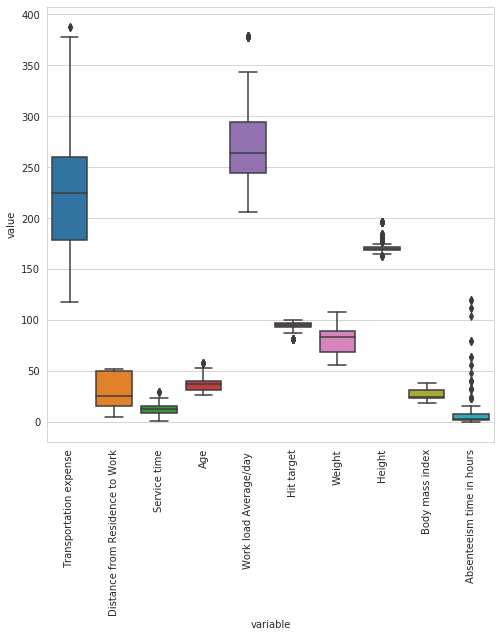

In [751]:
# exibir no boxlots, para visualização de outliers
plt.figure(figsize=(8,8))
sns.boxplot(x="variable", y="value", data=pd.melt(num_df))
plt.xticks(rotation=90)
plt.show()

In [752]:
# Identificar os outliers e depois removê-los, pois pode afetar no processamento de clusterização.
# Identificando pseudos padrões. Pois o sistema vai ser treinado com instâncias normais, e caso entre algum outro valor
#incomum vai ser fácil identificar o valor fora dos grupos de clusters.
for num_att in numerical_atts:
    # pegando o percentil entre 75% e 25% da variável dos valores das colunas
    Q3, Q1 = np.percentile(dados[num_att], [75,25])
    MEAN = dados[num_att].mean()
    
    # Calculando a amplitude interquartil
    IQR = Q3 - Q1
    
    # Calculating upper extream and lower extream
    minimum = Q1 - (IQR*1.5)
    maximum = Q3 + (IQR*1.5)
    
    # Replacing all the outliers value to Mean
    data_clean=dados.drop(dados.loc[dados[num_att]< minimum,num_att].index) 
    data_clean=dados.drop(dados.loc[dados[num_att]> maximum,num_att].index)

In [753]:
# redução de 150 valores da amostra de: 740.

len(data_clean)

150

In [754]:
#Normalização dos dados para identificar colunas importantes

numeric_transformer = MinMaxScaler()

# Excluir a variável principal(target), que determina o resultado. Pois a idéia é utilizar
# aprendizagem não supervisionada.
numerical_atts = [x for x in numerical_atts if x not in ['Absenteeism time in hours']]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_atts),
        ('cat', 'passthrough', categorical_atts)
    ], remainder='passthrough')
data_pp = preprocessor.fit_transform(data_clean)


In [755]:
#Selecionando as colunas

# Detectar variáveis importantes)
y_original = data_pp[:,-1].reshape(-1, 1)
y = np.round(MinMaxScaler((0,2)).fit_transform(y_original)).ravel()
X = np.delete(data_pp,-1,1) 

# validação cruzada com 10 divisões
cross_val = ShuffleSplit(n_splits=10, random_state = 42)

# definir modelo
rf = RandomForestClassifier(random_state = 0,max_features=None,n_jobs=-1)

# parameters 
parameters = {  
                "n_estimators":[1000],
                #'max_depth': list(range(1,11)),
                #"criterion": ["gini","entropy"],
                #"criterion": ["mse","mae"],
                #"class_weight": [None, "balanced"],
                #"max_features":["auto", None, "log2"],
                }

# Pesquisar no grid por parâmetros
grid = GridSearchCV(estimator=rf, param_grid=parameters, cv=cross_val, n_jobs=-1)#multithreading; todos os núcleos são usados
grid.fit(X,y)

# Imprimir as melhores pontuações
print("Os melhores parâmetros são %s Com uma pontuação de %0.4f"
      % (grid.best_params_, grid.best_score_))

Os melhores parâmetros são {'n_estimators': 1000} Com uma pontuação de 0.7133


([<matplotlib.patches.Wedge at 0x7f09a51f0b10>,
 [Text(-0.1313317475276619, 1.0921318473935877, 'Transportation expense'),
  Text(-0.3581127587593462, 1.0400746377129721, 'Distance from Residence to Work'),
  Text(-0.5948118466784025, 0.9253101464109366, 'Service time'),
  Text(-0.8413521534152558, 0.7086088864412525, 'Age'),
  Text(-1.0786359628887607, 0.21574165004244406, 'Work load Average/day '),
  Text(-1.027764258844849, -0.3920467169115161, 'Hit target'),
  Text(-0.8823204639788816, -0.6568946634309728, 'Weight'),
  Text(-0.7636117546052942, -0.7917683298974669, 'Height'),
  Text(-0.5050658629874362, -0.977194184410016, 'Body mass index'),
  Text(0.7140355146727428, -0.83675162610301, 'Reason for absence'),
  Text(1.049786167740627, 0.3285559343862898, 'Month of absence'),
  Text(0.8285714358130334, 0.7235118352554631, 'Day of the week'),
  Text(0.5455920522182793, 0.9551593126574469, 'Seasons'),
  Text(0.43057792989017457, 1.0122265785344169, 'Disciplinary failure'),
  Text(0.3

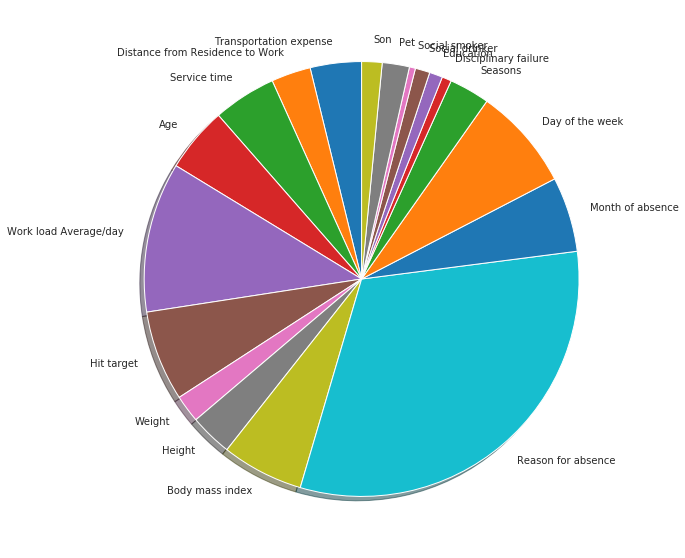

In [756]:
# Gráfico de pizza
atts = numerical_atts+categorical_atts
plt.figure(figsize=(10,10))
plt.pie(grid.best_estimator_.feature_importances_, labels=atts, shadow=True, startangle=90) 

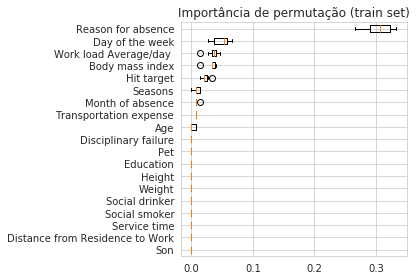

Reason for absence 0.305 +/- 0.021
Day of the week 0.049 +/- 0.013
Work load Average/day  0.035 +/- 0.009
Body mass index 0.033 +/- 0.007
Hit target 0.021 +/- 0.006
Seasons  0.009 +/- 0.004
Month of absence 0.007 +/- 0.002
Transportation expense 0.007 +/- 0.000
Age      0.003 +/- 0.003
Disciplinary failure 0.000 +/- 0.000
Pet      0.000 +/- 0.000
Education 0.000 +/- 0.000
Height   0.000 +/- 0.000
Weight   0.000 +/- 0.000
Social drinker 0.000 +/- 0.000
Social smoker 0.000 +/- 0.000
Service time 0.000 +/- 0.000
Distance from Residence to Work 0.000 +/- 0.000
Son      0.000 +/- 0.000


In [757]:
#importância da permutação com classificador de RF
atts_arr = np.array(atts)
result = permutation_importance(grid, X, y, n_repeats=10,
                                random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=atts_arr[sorted_idx])
ax.set_title("Importância de permutação (train set)")
fig.tight_layout()
plt.show()

for i in result.importances_mean.argsort()[::-1]:
     print(f"{atts_arr[i]:<8} "
           f"{result.importances_mean[i]:.3f}"
           f" +/- {result.importances_std[i]:.3f}")

In [758]:
# Selecionando os atributos mais relevantes.
selected_atts = ['Reason for absence', 'Day of the week', 'Work load Average/day ','Body mass index','Hit target', 
                    'Seasons', 'Month of absence', 'Transportation expense', 'Age']

,Reason for absence,Day of the week,Work load Average/day,Body mass index,Hit target,Seasons,Month of absence,Transportation expense,Age
ID,,,,,,,,,
11,26,3,239.554,30,97,1,7,289,33
36,0,3,239.554,31,97,1,7,118,50
3,23,4,239.554,31,97,1,7,179,38
7,7,5,239.554,24,97,1,7,279,39
11,23,5,239.554,30,97,1,7,289,33
...,...,...,...,...,...,...,...,...,...
11,14,3,264.604,30,93,1,7,289,33
1,11,3,264.604,29,93,1,7,235,37
4,0,3,271.219,34,95,1,0,118,40


In [780]:
############################################################################################################
#Clustering
############################################################################################################

# Problematica : Qual estação do ano costumasse ter mais faltas de funcionários, considerando as 4 features
# mais relevantes em questão. Realizaremos testes de 3 modelos de clusterização, e assim identificar o melhor, que
# classifica/representa os dados apresentados.

In [781]:
# Definindo dataset para trabalhar no meu modelo, considerando as variáveis mais relevantes.

dados_new = dados[['Reason for absence', 'Day of the week', 'Work load Average/day ','Body mass index', 'Seasons']]
dados_new.head()

,Reason for absence,Day of the week,Work load Average/day,Body mass index,Seasons
ID,,,,,
11,26,3,239.554,30,1
36,0,3,239.554,31,1
3,23,4,239.554,31,1
7,7,5,239.554,24,1
11,23,5,239.554,30,1


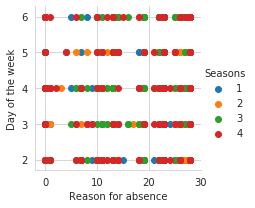

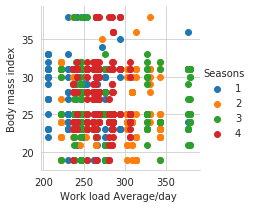

In [782]:
#visualizacao gráfica dos dados

sns.FacetGrid(dados_new,hue="Seasons").map(plt.scatter,"Reason for absence","Day of the week").add_legend()
sns.FacetGrid(dados_new,hue="Seasons").map(plt.scatter,"Work load Average/day ","Body mass index").add_legend()
plt.show()

In [783]:
#Capturando as features

features = dados_new.iloc[:, 0:4]
features

,Reason for absence,Day of the week,Work load Average/day,Body mass index
ID,,,,
11,26,3,239.554,30
36,0,3,239.554,31
3,23,4,239.554,31
7,7,5,239.554,24
11,23,5,239.554,30
...,...,...,...,...
11,14,3,264.604,30
1,11,3,264.604,29
4,0,3,271.219,34


In [809]:
#Normalização dos dados do novo dataset.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(features)
dados_normalizados = scaler.transform(features)

dados_normalizados_df = pd.DataFrame(dados_normalizados)
dados_normalizados_df.columns = features.columns
dados_normalizados_df.describe()


,Reason for absence,Day of the week,Work load Average/day,Body mass index
count,740.000000,740.000000,740.000000,740.000000
mean,0.686293,0.478716,0.379108,0.404054
std,0.301193,0.355419,0.225813,0.225550
min,0.000000,0.000000,0.000000,0.000000
25%,0.464286,0.250000,0.222412,0.263158
50%,0.821429,0.500000,0.337244,0.315789
75%,0.928571,0.750000,0.510502,0.631579
max,1.000000,1.000000,1.000000,1.000000


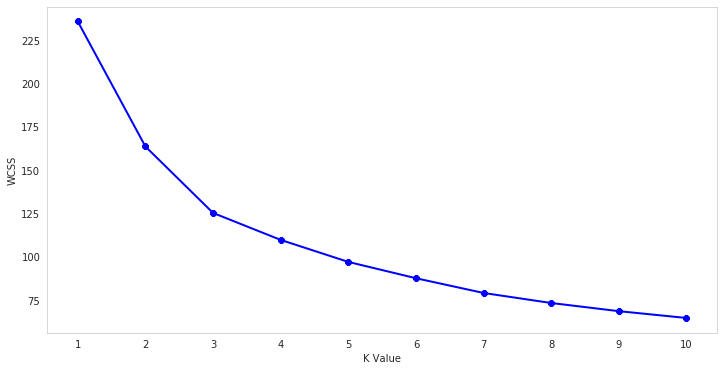

In [785]:
#Agrupamento KMeans

from sklearn.metrics import davies_bouldin_score as db
from sklearn.cluster import KMeans

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dados_normalizados)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="blue", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [786]:
# Analisando o gráfico de forma visual, pôde perceber que a partir do ponto 5, 
# já há uma queda significativa no coeficiente de 
# entropia, que é o grau de dispersão dos dados. Então do cluster 5 em diante há pouca mudança em relação 
# ao resto.

#Número de clusters
kmeans = KMeans(n_clusters=5)

#Treinar
kmeans.fit(dados_normalizados)

#labels
kmeans_labels = kmeans.labels_

dados_new['kmeans'] = kmeans_labels

dados_new

/home/anderson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Reason for absence,Day of the week,Work load Average/day,Body mass index,Seasons,kmeans
ID,,,,,,
11,26,3,239.554,30,1,0
36,0,3,239.554,31,1,1
3,23,4,239.554,31,1,0
7,7,5,239.554,24,1,3
11,23,5,239.554,30,1,2
...,...,...,...,...,...,...
11,14,3,264.604,30,1,1
1,11,3,264.604,29,1,1
4,0,3,271.219,34,1,1


In [787]:
db(features, kmeans.labels_)

4.641596698706846

In [788]:
#Kmedoids

from sklearn_extra.cluster import KMedoids

In [789]:
wcss = []
for k in range(1,11):
    kmedoids = KMedoids(metric="manhattan", n_clusters=k)
    kmedoids.fit(dados_normalizados)
    wcss.append(kmedoids.inertia_)

/home/anderson/anaconda3/lib/python3.7/site-packages/sklearn_extra/cluster/_k_medoids.py:235: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  "its corresponding cluster ({k}).".format(k=k)
/home/anderson/anaconda3/lib/python3.7/site-packages/sklearn_extra/cluster/_k_medoids.py:235: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  "its corresponding cluster ({k}).".format(k=k)
/home/anderson/anaconda3/lib/python3.7/site-packages/sklearn_extra/cluster/_k_medoids.py:235: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  "its corresponding cluster ({k}).".format(k=k)
/home/anderson/anaconda3/lib/python3.7/site-packages/sklearn_extra/cluster/_k_medoids.py:235: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its 

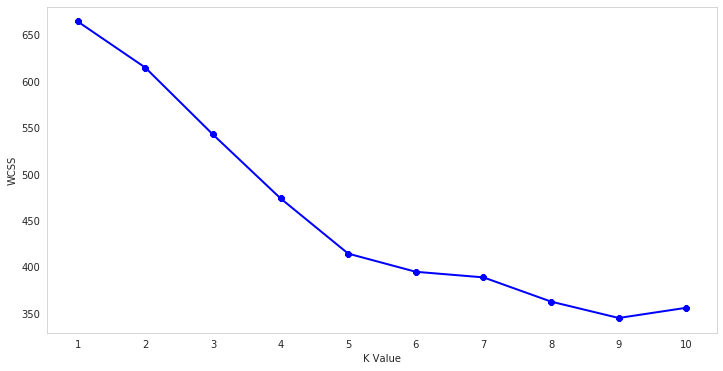

In [790]:
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="blue", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [794]:
kmedoids = KMedoids(metric="manhattan", n_clusters=5)
kmedoids.fit(dados_normalizados)
kmedoids_labels = kmedoids.labels_

/home/anderson/anaconda3/lib/python3.7/site-packages/sklearn_extra/cluster/_k_medoids.py:235: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  "its corresponding cluster ({k}).".format(k=k)


In [795]:
dados_new['kmedoids'] = kmedoids_labels

/home/anderson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [796]:
db(features, kmedoids.labels_)

3.7496329173352323

In [798]:
#DBSCAN
from sklearn.cluster import DBSCAN


In [799]:
dbscan = DBSCAN(eps=0.3, min_samples=10, metric='euclidean')
dbscan.fit(dados_normalizados)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [800]:
DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [801]:
dbscan_labels = dbscan.labels_ 

In [803]:
dados_new['dbscan'] = dbscan_labels

/home/anderson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [804]:
db(features, dbscan.labels_)

1.369602513919193

In [806]:
#hierarchical
import scipy.cluster.hierarchy as sch


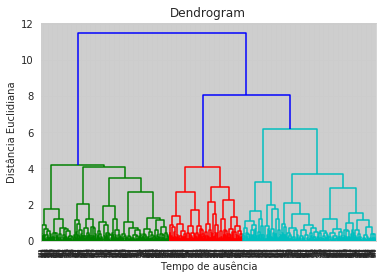

In [810]:
dendrogram = sch.dendrogram(sch.linkage(dados_normalizados, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Tempo de ausência')
plt.ylabel('Distância Euclidiana')
plt.show()

In [ ]:
#Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering

In [811]:
agg = AgglomerativeClustering(n_clusters=10, affinity='euclidean')

In [812]:
agg.fit(dados_normalizados)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=10)

In [813]:
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=10)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=10)

In [814]:
agg_labels = agg.labels_

In [816]:
dados_new['agglomerative'] = agg_labels

/home/anderson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [817]:
db(features, agg_labels)

5.963462899617648

In [818]:
dados_new

,Reason for absence,Day of the week,Work load Average/day,Body mass index,Seasons,kmeans,kmedoids,dbscan,agglomerative
ID,,,,,,,,,
11,26,3,239.554,30,1,0,3,0,3
36,0,3,239.554,31,1,1,1,0,0
3,23,4,239.554,31,1,0,3,0,3
7,7,5,239.554,24,1,3,2,0,5
11,23,5,239.554,30,1,2,3,0,4
...,...,...,...,...,...,...,...,...,...
11,14,3,264.604,30,1,1,2,0,0
1,11,3,264.604,29,1,1,1,0,0
4,0,3,271.219,34,1,1,2,0,0


In [822]:
#PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [823]:
dados_pca = pca.fit_transform(dados_normalizados)


In [824]:
from sklearn.preprocessing import LabelEncoder

In [828]:
LE = LabelEncoder()
dados_new['label'] = LE.fit_transform(dados['Seasons'])

/home/anderson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [829]:
dados_new

,Reason for absence,Day of the week,Work load Average/day,Body mass index,Seasons,kmeans,kmedoids,dbscan,agglomerative,label
ID,,,,,,,,,,
11,26,3,239.554,30,1,0,3,0,3,0
36,0,3,239.554,31,1,1,1,0,0,0
3,23,4,239.554,31,1,0,3,0,3,0
7,7,5,239.554,24,1,3,2,0,5,0
11,23,5,239.554,30,1,2,3,0,4,0
...,...,...,...,...,...,...,...,...,...,...
11,14,3,264.604,30,1,1,2,0,0,0
1,11,3,264.604,29,1,1,1,0,0,0
4,0,3,271.219,34,1,1,2,0,0,0


In [ ]:
#Plotando o resultado de cada algoritmo de glusterização

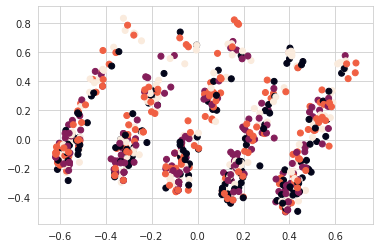

In [830]:
plt.scatter(dados_pca[:, 0],dados_pca[:, 1], c=dados['label'])

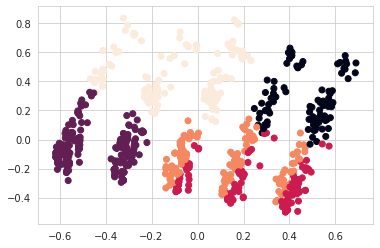

In [831]:
plt.scatter(dados_pca[:, 0],dados_pca[:, 1], c=dados['kmeans'])

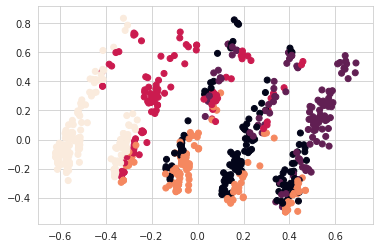

In [834]:
plt.scatter(dados_pca[:, 0],dados_pca[:, 1], c=dados_new['kmedoids'])

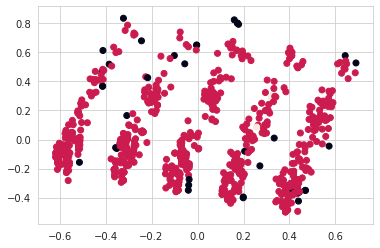

In [835]:
plt.scatter(dados_pca[:, 0],dados_pca[:, 1], c=dados_new['dbscan'])

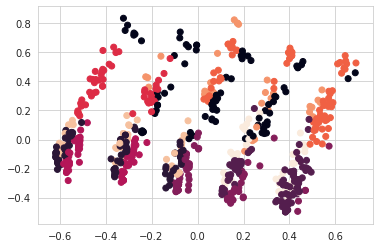

In [836]:
plt.scatter(dados_pca[:, 0],dados_pca[:, 1], c=dados_new['agglomerative'])


In [840]:
dados_new[dados_new['kmeans'] == 0]

,Reason for absence,Day of the week,Work load Average/day,Body mass index,Seasons,kmeans,kmedoids,dbscan,agglomerative,label
ID,,,,,,,,,,
11,26,3,239.554,30,1,0,3,0,3,0
3,23,4,239.554,31,1,0,3,0,3,0
1,22,2,239.554,29,1,0,3,0,2,0
3,23,4,239.554,31,1,0,3,0,3,0
3,21,2,239.554,31,1,0,3,0,2,0
...,...,...,...,...,...,...,...,...,...,...
36,23,2,237.656,31,3,0,3,0,2,2
34,28,3,237.656,28,3,0,3,0,3,2
34,25,2,275.089,28,1,0,0,0,2,0


In [841]:
dados_group_01 = pd.DataFrame(dados[dados['kmeans'] == 0])

In [842]:
dados_group_01.describe()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,...,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,kmeans,label
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.0,100.000000
mean,7.800000,6.83000,2.420000,2.680000,231.980000,26.70000,11.970000,36.390000,275.712790,93.930000,...,0.980000,0.510000,0.100000,0.830000,77.280000,172.870000,25.840000,13.98000,0.0,1.680000
std,5.158106,3.18156,0.496045,1.171031,71.518025,14.39732,4.120545,7.238917,40.507341,4.501975,...,1.034555,0.502418,0.301511,1.407448,11.972257,6.583811,3.762441,24.59407,0.0,1.171031
min,0.000000,0.00000,2.000000,1.000000,118.000000,5.00000,3.000000,28.000000,205.917000,81.000000,...,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.00000,0.0,0.000000
25%,1.000000,4.75000,2.000000,2.000000,179.000000,14.00000,9.000000,30.000000,244.924500,92.000000,...,0.000000,0.000000,0.000000,0.000000,68.750000,169.750000,24.000000,1.00000,0.0,1.000000
50%,10.000000,7.00000,2.000000,3.000000,228.000000,26.00000,12.000000,37.000000,265.316000,95.000000,...,1.000000,1.000000,0.000000,0.000000,75.500000,171.000000,25.000000,8.00000,0.0,2.000000
75%,12.250000,10.00000,3.000000,4.000000,281.500000,31.00000,14.500000,40.000000,294.217000,97.000000,...,2.000000,1.000000,0.000000,1.000000,88.000000,172.000000,29.000000,8.00000,0.0,3.000000
max,15.000000,12.00000,3.000000,4.000000,388.000000,52.00000,18.000000,58.000000,378.884000,100.000000,...,4.000000,1.000000,1.000000,8.000000,100.000000,196.000000,35.000000,120.00000,0.0,3.000000


In [839]:
#Conclusão.  (Mudar a variável alvo)

# Diante análises percebe-se que o algoritmo de clusterização mais pontuado nessa questão foi o
# DBSCAN, porém não podemos tirar muitas conclusões, porém o mesmo, só selecionou dois agrupamentos, e é claro
# diminuindo bastante o grau de entropia dos dados, consequentimente, com dois cluters o grau de erro pode ser
# bastante acentuado.